Model loaded successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,120,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,421,652 (58.83 MB)

 Trainable params: 5,140,486 (19.61 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 10,280,974 (39.22 MB)

Found 3000 images belonging to 6 classes.


d:\Virtual\rj\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step

Confusion Matrix:
 [[386   5   2   3   6  35]
 [  2 466   0   2   0   4]
 [ 13   5 410  64  50  11]
 [ 12   4  52 395  58   4]
 [ 28   4  16  17 442   3]
 [ 67  13   3   2   3 413]]

Classification Report:
               precision    recall  f1-score   support

   buildings       0.76      0.88      0.82       437
      forest       0.94      0.98      0.96       474
     glacier       0.85      0.74      0.79       553
    mountain       0.82      0.75      0.78       525
         sea       0.79      0.87      0.83       510
      street       0.88      0.82      0.85       501

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000


Test Accuracy: 83.73%


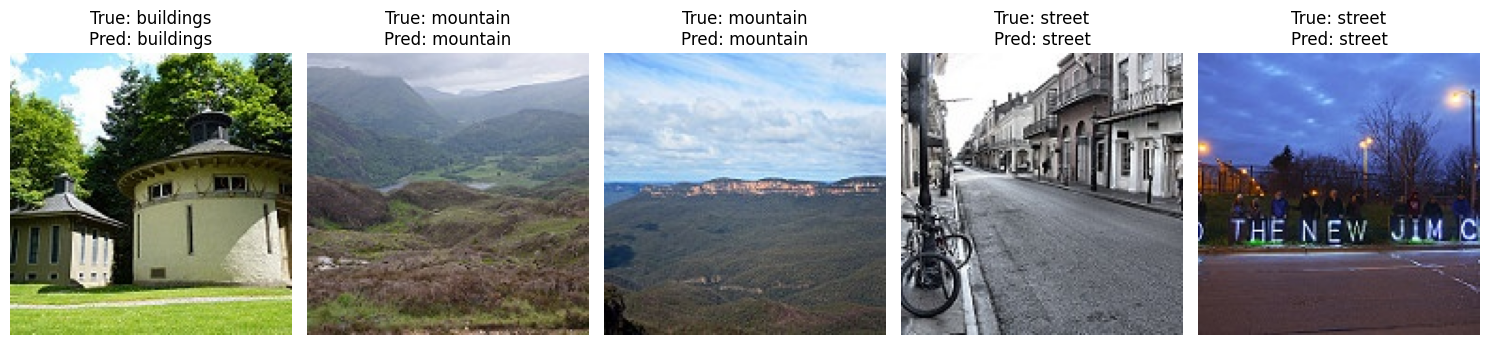

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import os

# Load the model from the saved .keras file
model = load_model('D:\\Virtual\\best_model.keras')  # Use raw string literal for Windows paths

# Print model summary to verify successful loading
print("Model loaded successfully!")
model.summary()

# Define paths for test data
test_data = "seg_test"

# ImageDataGenerator for the test set
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Generator for the test data
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(100, 100),  # Ensure this matches the input size of your model
    batch_size=64,  # Match the batch size used during training
    class_mode='categorical',
    shuffle=False  # Do not shuffle for consistent evaluation
)

# Make predictions on the test data
test_generator.reset()  # Reset the generator for accurate predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Ground truth labels
true_classes = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix and classification report
print("\nConfusion Matrix:\n", confusion_matrix(true_classes, predicted_classes))
print("\nClassification Report:\n", classification_report(true_classes, predicted_classes, target_names=class_labels))

# Accuracy score
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Visualize some predictions
def plot_sample_predictions(test_generator, predictions, num_samples=5):
    """
    Function to plot sample images with predicted and true labels.
    
    Parameters:
    test_generator: ImageDataGenerator object for test data
    predictions: Predictions made by the model
    num_samples: Number of samples to visualize
    """
    # Randomly select sample indices
    sample_indices = np.random.choice(range(len(predictions)), num_samples, replace=False)
    
    # Plot the selected samples
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(sample_indices):
        # Load image and labels
        img_path = test_generator.filepaths[idx]
        img = plt.imread(img_path)
        
        # True and predicted labels
        true_label = class_labels[true_classes[idx]]
        predicted_label = class_labels[predicted_classes[idx]]
        
        # Display the image with labels
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize some predictions
plot_sample_predictions(test_generator, predicted_classes, num_samples=5)
